In [61]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

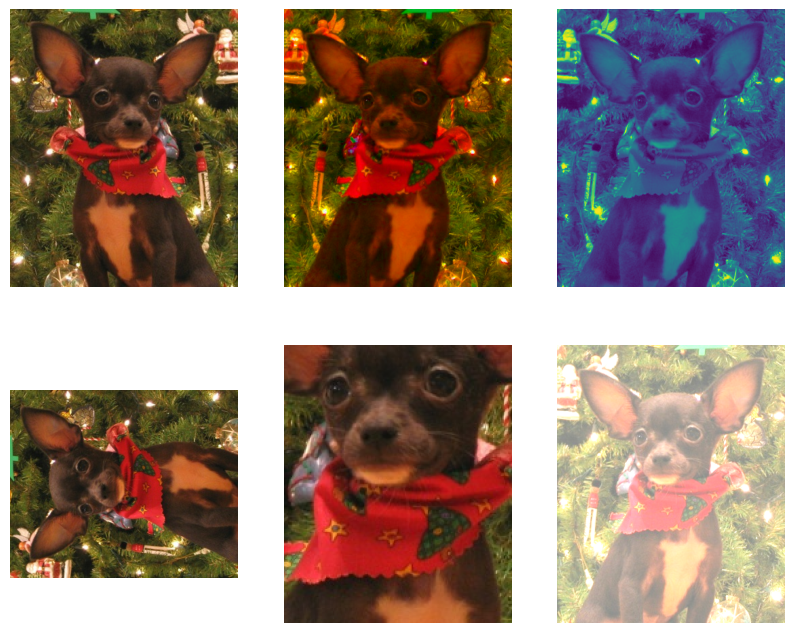

In [62]:
data, info = tfds.load('cats_vs_dogs', with_info=True)
image = data['train'].skip(1).take(1)
image = list(image)[0]['image']

augmentations = [tf.image.flip_left_right,
                 lambda x: tf.image.random_saturation(x, 3, 10),
                 tf.image.rgb_to_grayscale,
                 lambda x: tf.image.rot90(x, k=1),
                 lambda x: tf.image.central_crop(x, 0.5),
                 lambda x: tf.image.adjust_brightness(x, delta=0.5)
                ]

plt.figure(figsize=(10, 8))
for i, augmentation in enumerate(augmentations):
    augmented_image = augmentation(image)
    plt.subplot(2, 3, i+1)
    plt.imshow(augmented_image.numpy().squeeze())
    plt.axis('off')

plt.show()